    선형회귀(linear regression)는 100여 년 전에 개발되었다.
    선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행
    특성이 하나일 때는 직선, 두개일 때는 평면, 더 높은 차원 초평면(hyperplane)
    KnnRegressor과 비교해 보면 직선이 사용한 예측이 더 제약이 있음.
    특성이 많은 데이터 셋이라면 선형 모델은 휼륭한 성능을 갖는다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 01.회귀 선형 모델 그래프로 살펴보기

w[0]: 0.393906  b: -0.031804


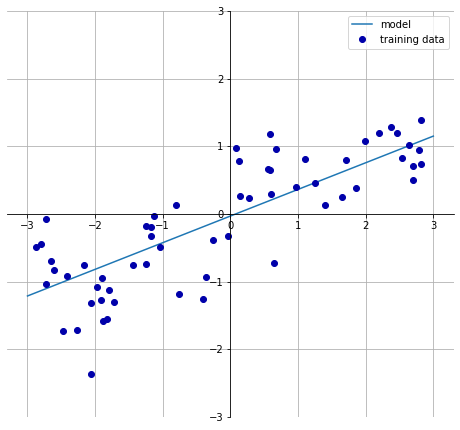

In [7]:
mglearn.plots.plot_linear_regression_wave()

## 02.Boston 데이터 셋을 활용한 회귀 모델 만들어보기

    (1) 모델 만들기 [ 모델명 = 모델객체() ]
    (2) 모델 학습 시키기 [ 모델명.fit() ]
    (3) 모델을 활용한 예측하기 [ 모델명.predict() ]
    (4) 모델 평가

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [13]:
boston = load_boston()
X = boston.data
y = boston.target

## 데이터 준비하기

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,
random_state=30)

In [45]:
model = LinearRegression().fit(X_train, y_train)   # 학습
pred = model.predict(X_test)
pred

array([17.39147327, 12.41363413, 19.85934436, 31.50042761, 15.75702458,
       17.73775642, 20.17320567, 41.71916027, 15.46522809, 24.26095398,
       20.01457803, 33.07568558, 21.68100058, 29.718935  , 12.93159771,
       24.28727871, 14.44400397, 28.05153449, 15.20149991, 27.09665867,
       20.82169746, 17.95261421, 31.0691493 , 13.16333568, 15.63311811,
       16.63054263, 18.16733424,  0.29215425, 13.95084182, 13.58747266,
       17.14003356, 22.94799107, 32.95880782, 29.04028663, 19.29448342,
       22.5893101 , 11.49999544, 22.28666304, 20.01865476, 19.00002805,
       17.49110066, 20.11111319, 41.16072928, 24.13584018, 26.37625232,
       21.02007219, 22.5888486 , 17.79446088, 18.37245128, 14.65491197,
       15.4173279 , 18.13399454, 18.92506322, 25.21839007, 30.9718008 ,
       23.22956707, 36.599214  , 25.00731145, 14.99849288, 36.08166587,
       23.31314286, 20.15243908, 31.22702779, 20.38266922, 18.10085483,
       11.2312021 , 17.34187307, 24.47962875, 35.59846762, 32.67

In [18]:
import pandas as pd

In [46]:
dat = pd.DataFrame( {"y_test":y_test, "prediction":pred , "diff":y_test - pred} )
dat

,y_test,prediction,diff
0,19.6,17.391473,2.208527
1,10.5,12.413634,-1.913634
2,19.3,19.859344,-0.559344
3,29.9,31.500428,-1.600428
4,15.2,15.757025,-0.557025
5,14.5,17.737756,-3.237756
6,20.1,20.173206,-0.073206
7,46.0,41.719160,4.280840
8,11.7,15.465228,-3.765228
9,27.5,24.260954,3.239046


### MAE
    절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표입니다.
    MSE 보다 특이치에 robust합니다.
    절대값을 취하기 때문에 모델이 underperformance 인지 overperformance 인지 알 수 없습니다.
    underperformance: 모델이 실제보다 낮은 값으로 예측
    overperformance: 모델이 실제보다 높은 값으로 예측

In [47]:
sum(abs(dat['diff']))/ len(dat['diff'])

3.382328457043966

In [48]:
dat['diff'] ** (2)

0        4.877590
1        3.661996
2        0.312866
3        2.561369
4        0.310276
5       10.483067
6        0.005359
7       18.325589
8       14.176943
9       10.491419
10      16.690673
11      23.772310
12      36.978568
13      32.706218
14       0.135720
15       3.658503
16       1.089944
17      66.397490
18       1.955802
19      20.219939
20       1.388397
21       0.566428
22      35.630743
23      28.479986
24       6.416687
25       6.098220
26       2.665597
27     182.461897
28       0.203258
29      13.050354
          ...    
122     36.002706
123     13.800261
124      1.716102
125      1.600657
126      0.025967
127      2.850564
128     15.182503
129     35.931457
130     88.226504
131     16.306994
132      2.049934
133     24.024942
134     31.983989
135     35.205967
136      1.411391
137     38.772158
138    760.149228
139      7.969682
140     49.513566
141      0.215644
142     12.412746
143      5.022046
144      0.097557
145     12.459102
146     26

### MSE
    (실제값-예측값) ^ 2 의 합를 데이터의 샘플의 개수로 나누어준것
    제곱을 하기 때문에 MAE와는 다르게 모델의 예측값과 실제값 차이의 면적의 합입니다. 이런 차이로, 특이값이 존재하면 수치가 많이 늘어납니다.

In [49]:
mse_value = sum(dat['diff'] ** 2) / len(dat['diff'])
mse_value


21.90022422345887

### RMSE
    (실제값-예측값) ^ 2 의 합을 데이터의 샘플의 개수로 나누어 준 이후에 제곱근 씌우기
    RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 합니다.

In [25]:
# (1) 제곱에 루트를 씌워구하기 (2) 제곱한 값을 길이로 나누기
result = np.sqrt(mse_value)
print(result)

4.700924890603784


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test, pred)

22.098694827098196

In [28]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.75
테스트 데이터 세트 점수 : 0.68


In [ ]:
2-2 MSE 구해서 좋은거 찾기 